In [3]:
import pandas as pd
import numpy as np
from losses import rmse_loss, mse_loss
import matplotlib.pyplot as plt

In [4]:
house_dataset = pd.read_csv('../data/ParisHousing.csv')

# House Price Prediction Data Preparation

In [5]:
from sklearn.model_selection import train_test_split
X = house_dataset.copy()
X = X.drop(columns=['price'])
y = house_dataset['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train_array = np.array(y_train.values)
y_test_array = np.array(y_test.values)
X_train_array = np.array(X_train.values)
X_test_array = np.array(X_test.values)

# Implementation of a Custom Decision Tree Regressor without roulette

In [31]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if variance_reduction > best_variance_reduction:
                    best_variance_reduction = variance_reduction
                    best_feature_index = feature_index
                    best_threshold = threshold
            

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)


# Performance Evaluation Plots

In [7]:
def create_plots(min_samples_split_list, r2_scores, mse_losses, rmse_losses):

    fig, axs = plt.subplots(3, figsize=(10, 15))
    axs[0].plot(min_samples_split_list, r2_scores, marker='o')
    axs[0].set_title('R^2 score')
    axs[0].set_xlabel('min_samples_split')
    axs[0].set_ylabel('R^2 score')
    axs[0].grid(True)
    axs[1].plot(min_samples_split_list, mse_losses, marker='o')
    axs[1].set_title('MSE loss')
    axs[1].set_xlabel('min_samples_split')
    axs[1].set_ylabel('MSE loss')
    axs[1].grid(True)
    axs[2].plot(min_samples_split_list, rmse_losses, marker='o')
    axs[2].set_title('RMSE loss')
    axs[2].set_xlabel('min_samples_split')
    axs[2].set_ylabel('RMSE loss')
    axs[2].grid(True)
    plt.tight_layout()
    plt.show()

# Performance Tests

In [8]:
max_depth_list = [1, 5, 10, 15, 20, 25,  50, 100]

=======MAX DEPTH = 1======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.745696101
MSE loss: 2090411123032.6482
RMSE loss: 1445825.4123623115
=======MAX DEPTH = 5======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999018126
MSE loss: 8071129899.344848
RMSE loss: 89839.46738123978
=======MAX DEPTH = 10======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998609
MSE loss: 11435895.252031906
RMSE loss: 3381.7000535280927
=======MAX DEPTH = 15======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998822
MSE loss: 9685766.680829708
RMSE loss: 3112.1964399487556
=======MAX DEPTH = 20======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998822
MSE loss: 9685766.680829708
RMSE loss: 3112.1964399487556
=======MAX DEPTH = 25======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998822
MSE loss: 9685766.680829708
RMSE loss: 3112.1964399487556
=======MAX DEPTH = 50======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998822
MSE loss: 9685766.680829708
RMSE loss: 3112.1964399487556
=======MAX DEPTH = 100======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998822
MSE loss: 9685766.680829708
RMSE loss: 3112.1964399487556


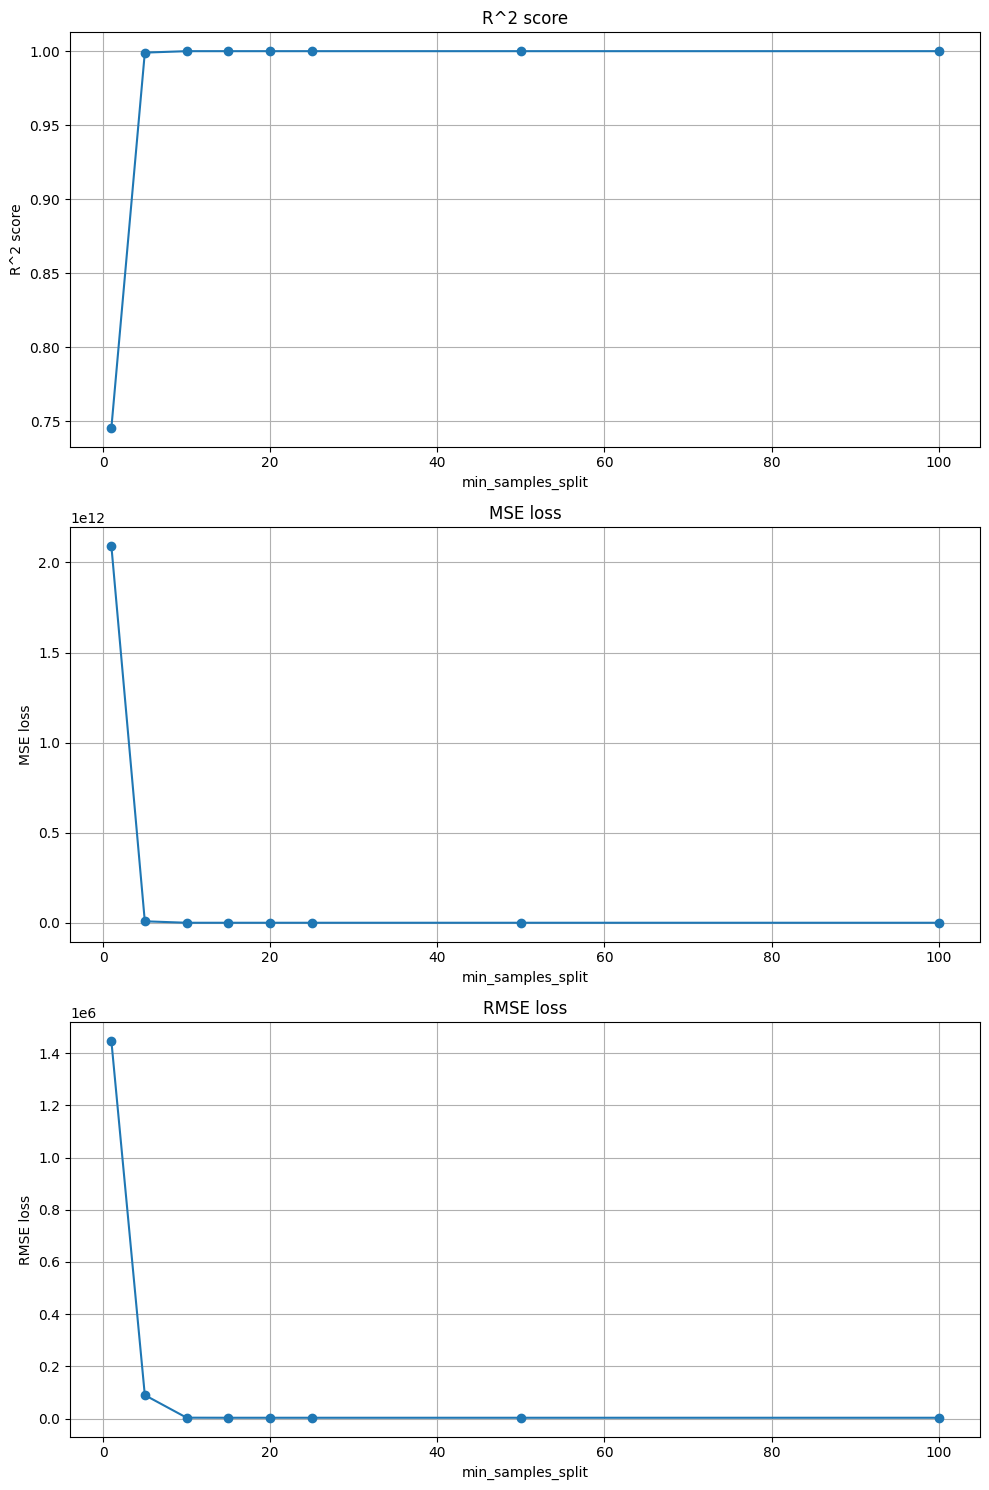

In [9]:
from sklearn.metrics import r2_score

r2_scores = []
mse_losses = []
rmse_losses = []
for max_depth1 in max_depth_list:
    print(f"=======MAX DEPTH = {max_depth1}======")
    tree = CustomDecisionTreeRegressor(max_depth=max_depth1, min_samples_split=10, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_train_array)
    score = r2_score(y_train_array, y_pred)
    mse = mse_loss(y_train_array, y_pred)
    rmse = rmse_loss(y_train_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse}")
    print(f"RMSE loss: {rmse}")
    r2_scores.append(score)
    mse_losses.append(mse)
    rmse_losses.append(rmse)
create_plots(max_depth_list, r2_scores, mse_losses, rmse_losses)

In [24]:
min_samples_split_list = [2, 5, 10, 15, 25, 50, 100]

In [25]:
for min_samples_split in min_samples_split_list:
    print(f"=======MIN SAMPLES  SPLIT= {min_samples_split}======")
    tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=min_samples_split, min_samples=5)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_train_array)
    score = r2_score(y_train_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_train_array, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_train_array, y_pred)}")

=======MIN SAMPLES  SPLIT= 2======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998609
MSE loss: 11435895.252031906
RMSE loss: 3381.7000535280927
=======MIN SAMPLES  SPLIT= 5======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998609
MSE loss: 11435895.252031906
RMSE loss: 3381.7000535280927
=======MIN SAMPLES  SPLIT= 10======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998609
MSE loss: 11435895.252031906
RMSE loss: 3381.7000535280927
=======MIN SAMPLES  SPLIT= 15======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999997931
MSE loss: 17008781.89967586
RMSE loss: 4124.170449881511
=======MIN SAMPLES  SPLIT= 25======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999995384
MSE loss: 37942808.61330838
RMSE loss: 6159.773422237898
=======MIN SAMPLES  SPLIT= 50======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999983560
MSE loss: 135135058.198703
RMSE loss: 11624.760565220386
=======MIN SAMPLES  SPLIT= 100======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999940330
MSE loss: 490495105.958714
RMSE loss: 22147.124101307465


In [26]:
min_samples_leaf_list = [2, 5, 10, 15, 25, 50, 100]

In [27]:
for min_samples_leaf in min_samples_leaf_list:
    print(f"=======MIN SAMPLES  LEAF= {min_samples_leaf}======")
    tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples=min_samples_leaf)
    tree.fit(X_train_array, y_train_array)
    y_pred = tree.predict(X_train_array)
    score = r2_score(y_train_array, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_train_array, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_train_array, y_pred)}")

=======MIN SAMPLES  LEAF= 2======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998691
MSE loss: 10756126.657198757
RMSE loss: 3279.6534355322906
=======MIN SAMPLES  LEAF= 5======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998609
MSE loss: 11435895.252031906
RMSE loss: 3381.7000535280927
=======MIN SAMPLES  LEAF= 10======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999996554
MSE loss: 28327559.8064971
RMSE loss: 5322.36411818067
=======MIN SAMPLES  LEAF= 15======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999992172
MSE loss: 64345779.19874935
RMSE loss: 8021.582088263471
=======MIN SAMPLES  LEAF= 25======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999983290
MSE loss: 137358348.72328496
RMSE loss: 11719.997812426629
=======MIN SAMPLES  LEAF= 50======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999940226
MSE loss: 491351606.8455816
RMSE loss: 22166.452283700735
=======MIN SAMPLES  LEAF= 100======


c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999752775
MSE loss: 2032224308.3109527
RMSE loss: 45080.19862767857


# Implementation of a Custom Decision Tree Regressor without roulette

In [29]:
import numpy as np
import random

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index 
        self.threshold = threshold
        self.left = left  
        self.right = right
        self.value = value  

class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=1, min_samples=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples = min_samples

    def fit(self, X, y):
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        variance = np.var(y)

        if depth == self.max_depth or n_samples <= self.min_samples_split or variance == 0 or n_samples < 2*self.min_samples + 1:
            return Node(value=np.mean(y))
        best_variance_reduction = 0
        best_feature_index = None
        best_threshold = None
        for feature_index in range(n_features):
            thresholds, values = zip(*sorted(zip(X[:, feature_index], y)))
            thresholds_reductions = []

            for i in range(self.min_samples, n_samples - self.min_samples):
                if values[i-1] == values[i]:
                    continue  
                threshold = (thresholds[i-1] + thresholds[i]) / 2
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                variance_reduction = variance - (len(y_left) / n_samples * np.var(y_left) + len(y_right) / n_samples * np.var(y_right))
                if np.isfinite(variance_reduction):
                    thresholds_reductions.append((threshold, variance_reduction))
            
            if thresholds_reductions:
                _, weights = zip(*thresholds_reductions)
                threshold, variance_reductions = zip(*random.choices(thresholds_reductions, weights=weights, k=1))
                variance_reduction = variance_reductions[0]

            if variance_reduction > best_variance_reduction:
                best_variance_reduction = variance_reduction
                best_feature_index = feature_index
                best_threshold = threshold

        if best_variance_reduction == 0:
            return Node(value=np.mean(y))

        left_indices = X[:, best_feature_index] <= best_threshold
        right_indices = X[:, best_feature_index] > best_threshold
        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)
        return Node(feature_index=best_feature_index, threshold=best_threshold, left=left, right=right)

    def predict(self, X):
        return np.array([self._predict_tree(x, self.tree_) for x in X])

    def _predict_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._predict_tree(x, node.left)
        else:
            return self._predict_tree(x, node.right)



In [32]:
tree = CustomDecisionTreeRegressor(max_depth=10, min_samples_split=10, min_samples=5)
tree.fit(X_train_array, y_train_array)
y_pred = tree.predict(X_train_array)
score = r2_score(y_train_array, y_pred)
print(f"R^2 score: {score:.9f}")
print(f"MSE loss: {mse_loss(y_train_array, y_pred)}")
print(f"RMSE loss: {rmse_loss(y_train_array, y_pred)}")

c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


R^2 score: 0.999998609
MSE loss: 11435895.252031906
RMSE loss: 3381.7000535280927
